Creaeted to plot the output of coherence_test.py. May be edited to plot other versions of similar output from other files.

In [88]:
import datetime
from matplotlib.colors import LogNorm
import matplotlib.dates as mdates
import matplotlib.pyplot as plt
import pickle
import numpy as np

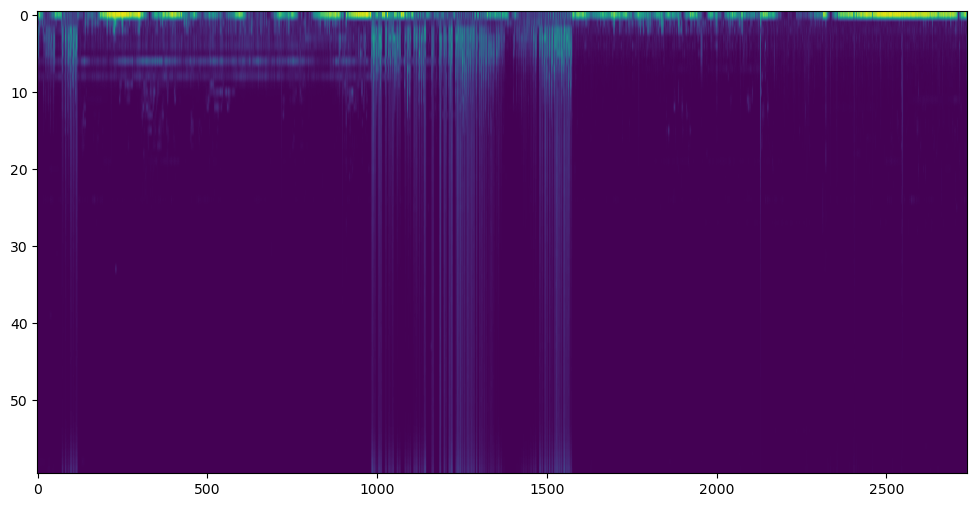

In [91]:
# file = r"D:\CSM\Mines_Research\Repositories\Coherence_Analyses\test_results\exact_detection_significance_160312000048.pkl"
# file = r"D:\CSM\Mines_Research\Repositories\Coherence_Analyses\test_results\qr_detection_significance_160312000048.pkl"
# file = r"D:\CSM\Mines_Research\Repositories\Coherence_Analyses\test_results\qr_detection_significance_160314083848.pkl"
# file = r"D:\CSM\Mines_Research\Repositories\Coherence_Analyses\test_results\exact_detection_significance_160314083848.pkl"
# file = r"D:\CSM\Mines_Research\large_scale_coherence_results\qr_detection_significance_160313000018_160314235949.pkl"
file = r"D:\CSM\Mines_Research\large_scale_coherence_results\exact_detection_significance_160313000018_160314235949.pkl"
with open(file, "rb") as f:
    detection_significances = pickle.load(f)
plt.figure(figsize=(12, 6))
# plt.plot(detection_significances[:100])

plt.imshow(detection_significances.T, aspect="auto")
# detection_significances.shape

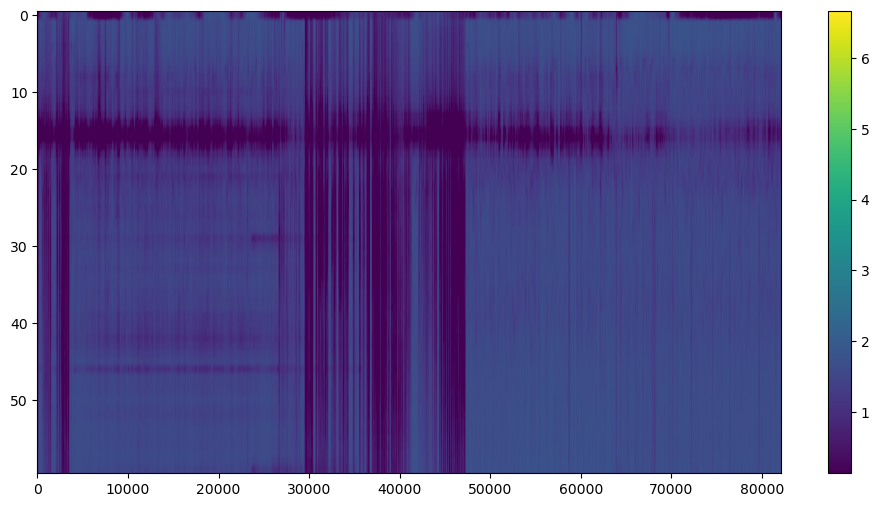

In [77]:
# file = r"D:\CSM\Mines_Research\Repositories\Coherence_Analyses\test_results\qr_eig_estimates_160314083848.pkl"
file = r"D:\CSM\Mines_Research\large_scale_coherence_results\qr_eig_estimatess_160313000018_160314235949.pkl"
with open(file, "rb") as f:
    eig_estimates = pickle.load(f)
plt.figure(figsize=(12, 6))
plt.imshow(np.log(eig_estimates), aspect="auto", vmax=np.percentile(eig_estimates, 80), vmin=np.percentile(eig_estimates, 1))
plt.colorbar()
# eig_estimates.shape
# np.min(eig_estimates)

In [18]:
file = r"D:\CSM\Mines_Research\large_scale_coherence_results\qr_metadata_160313000018_160314235949.pkl"
with open(file, "rb") as f:
    metadata = pickle.load(f)

In [151]:
metadata.keys()
metadata["sub_window_length"]
metadata["sampling_rate"]
metadata['files'][-1]
# meta data int array
met = np.array([int(a) for a in metadata['files']])

intervals = met[1:] - met[:-1]
# plt.hist(intervals, bins=100)
np.where(intervals == np.max(intervals[2889:]))
# intervals[2877:2882] # [2879]
# metadata['files'][4632+342:4632+348]  #[4626:4632]
metadata['files'][4626:4632]
# plt.plot(intervals[4632+345:4632+375])
# plt.yscale("log")
# intervals[4632+345]
# metadata['files'][4977]

['160314143318',
 '160314143348',
 '160314143418',
 '160314164042',
 '160314164112',
 '160314164142']

In [153]:
len(metadata['files'])

5480

In [147]:
(60*24*2 - 2601) /2

139.5

In [79]:
re = eig_estimates.reshape((60, int(eig_estimates.shape[1]/30), 30))
# re[0, 0] == eig_estimates[0,:30]
red = re / np.tile(np.sum(re, axis=2), (30, 1, 1)).transpose(1, 2, 0)
# red = re / np.sum(re, axis=2)
red = red.reshape(eig_estimates.shape)
# np.sum(re, axis=2).shape
red = np.log(red)

In [49]:
start_time = datetime.datetime(2016, 3, 13, 0, 0, 18)
end_time = datetime.datetime(2016, 3, 14, 23, 59, 49)
time_lims = mdates.date2num([start_time, end_time])

# freqs = np.linspace(0, int(metadata["sampling_rate"]/2 * (3/5)), 1/metadata["sub_window_length"])
freqs = np.linspace(0, int(metadata["sampling_rate"]/2 * (3/5)), red.shape[0])
freq_lims = [freqs[1], freqs[-1]]

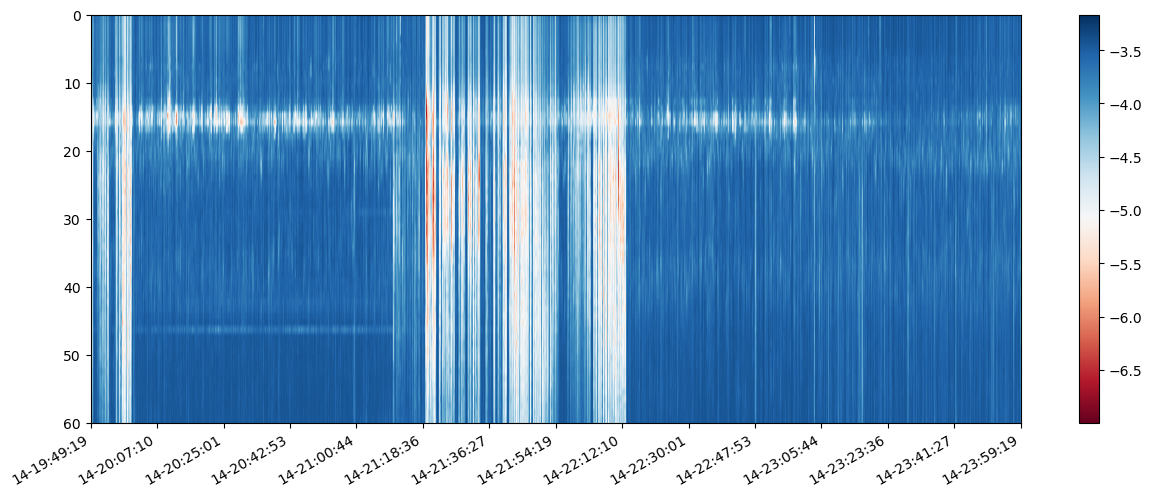

In [156]:
last_ind = -1
# plt.figure(figsize=(12, 6))
fig, ax = plt.subplots(figsize=(15, 6))
im = ax.imshow(red[1:,:last_ind], extent=[time_lims[0],time_lims[-1], 60, freq_lims[0]], aspect="auto", vmax=np.percentile(red[1:,:last_ind], 80), vmin=np.percentile(red[1:,:last_ind], 1), cmap="RdBu")
ax.xaxis.set_ticks(np.linspace(time_lims[0], time_lims[-1], 15))
fig.colorbar(im)
ax.xaxis_date()
fig.autofmt_xdate()
ax.xaxis.set_major_formatter(mdates.DateFormatter("%d-%H:%M:%S"))
# gca().xaxis.set_major_formatter(...)
# plt.colorbar()

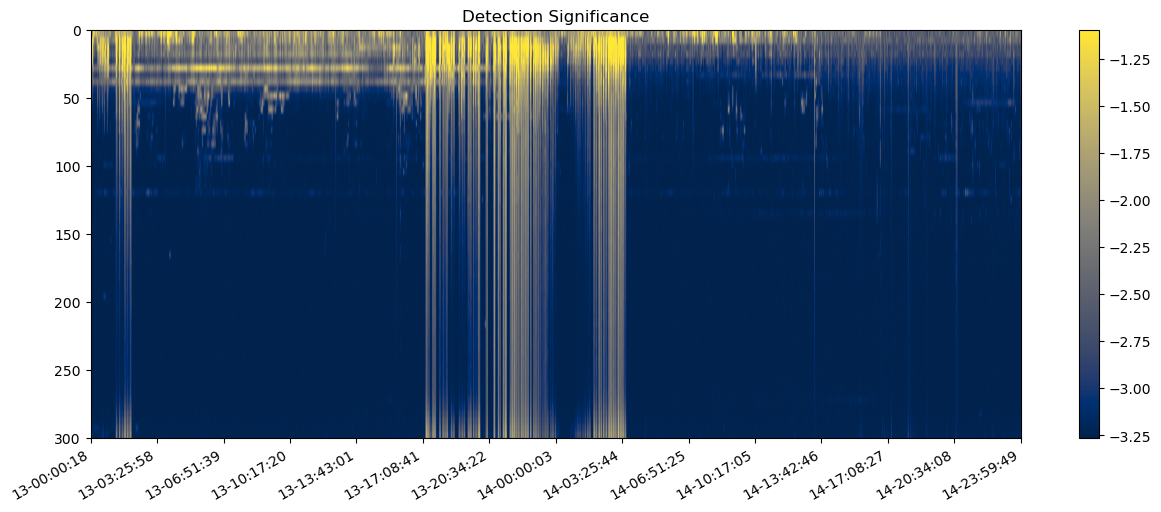

In [101]:
fig, ax = plt.subplots(figsize=(15, 6))
log_det_sig = np.log(detection_significances[:last_ind,1:])
# im = ax.imshow(detection_significances.T, extent=[time_lims[0],time_lims[-1], 60, freq_lims[0]], aspect="auto", norm=LogNorm(vmax=np.percentile(detection_significances.T[1:,:last_ind], 80), vmin=np.percentile(detection_significances.T[1:,:last_ind], 1)), cmap="cividis")
# im = ax.imshow(detection_significances.T, extent=[time_lims[0],time_lims[-1], freq_lims[-1], freq_lims[0]], aspect="auto", vmax=np.percentile(detection_significances.T[1:,:last_ind], 80), vmin=np.percentile(detection_significances.T[1:,:last_ind], 1), cmap="cividis")
im = ax.imshow(log_det_sig.T, extent=[time_lims[0],time_lims[-1], freq_lims[-1], freq_lims[0]], aspect="auto", vmax=np.percentile(log_det_sig.T, 99), vmin=np.percentile(log_det_sig.T, 10), cmap="cividis")
ax.set_title("Detection Significance")
ax.xaxis.set_ticks(np.linspace(time_lims[0], time_lims[-1], 15))
fig.colorbar(im)
ax.xaxis_date()
fig.autofmt_xdate()
ax.xaxis.set_major_formatter(mdates.DateFormatter("%d-%H:%M:%S"))

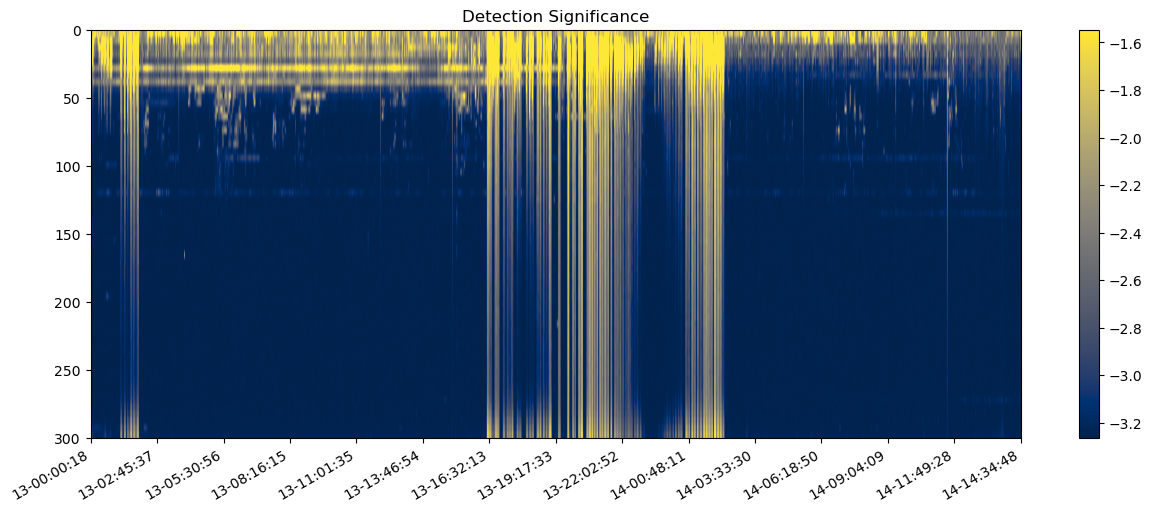

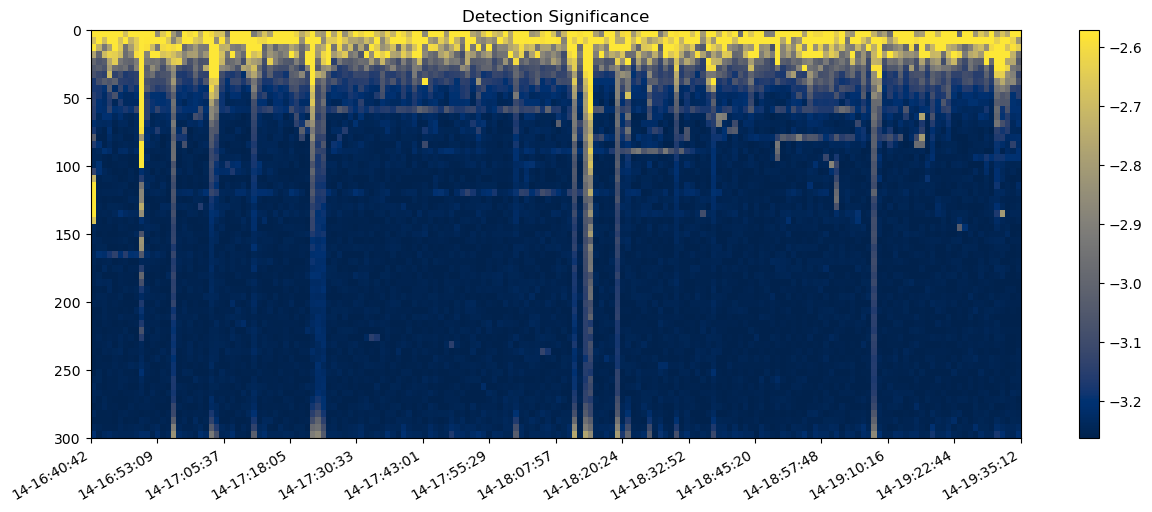

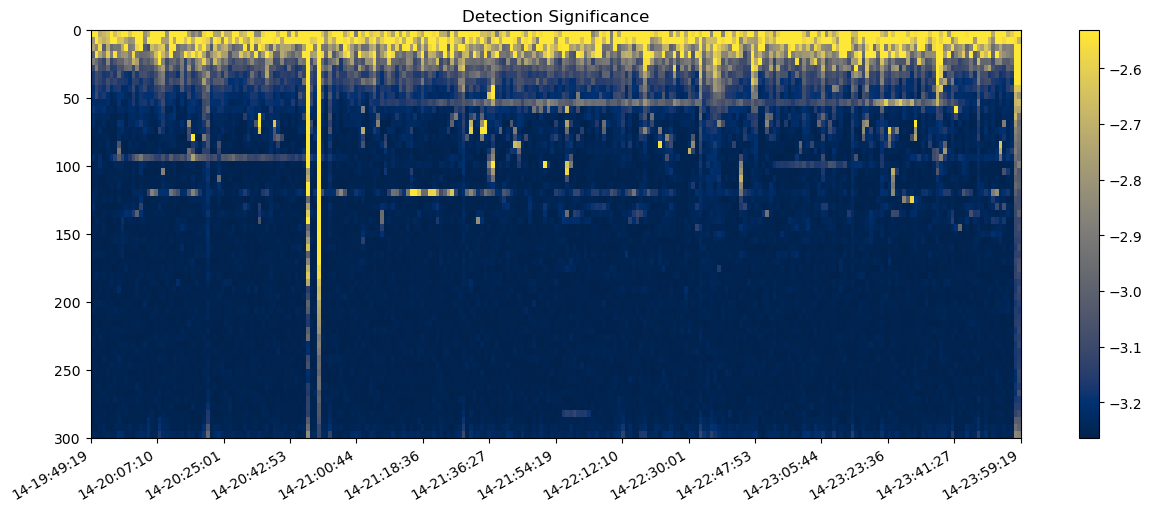

In [155]:
continuous_ind_ranges = [[0,2314], [2314, 2488], [2488, 2740]]
continuous_time_ranges = [[datetime.datetime(2016, 3, 13, 0, 0, 18), datetime.datetime(2016, 3, 14, 14, 34, 48)], [datetime.datetime(2016, 3, 14, 16, 40, 42), datetime.datetime(2016, 3, 14, 19, 35, 12)], [datetime.datetime(2016, 3, 14, 19, 49, 19), datetime.datetime(2016, 3, 14, 23, 59, 19)]]
i = 0
for r in continuous_ind_ranges:
    time_lims = mdates.date2num([continuous_time_ranges[i][0], continuous_time_ranges[i][1]])
    fig, ax = plt.subplots(figsize=(15, 6))
    log_det_sig = np.log(detection_significances[r[0]:r[1],1:])
    im = ax.imshow(log_det_sig.T, extent=[time_lims[0],time_lims[-1], freq_lims[-1], freq_lims[0]], aspect="auto", vmax=np.percentile(log_det_sig.T, 97), vmin=np.percentile(log_det_sig.T, 10), cmap="cividis")
    ax.set_title("Detection Significance")
    ax.xaxis.set_ticks(np.linspace(time_lims[0], time_lims[-1], 15))
    fig.colorbar(im)
    ax.xaxis_date()
    fig.autofmt_xdate()
    ax.xaxis.set_major_formatter(mdates.DateFormatter("%d-%H:%M:%S"))
    i += 1

In [ ]:
fig, ax = plt.subplots(figsize=(15, 6))
log_det_sig = np.log(detection_significances[:last_ind,1:])
# im = ax.imshow(detection_significances.T, extent=[time_lims[0],time_lims[-1], 60, freq_lims[0]], aspect="auto", norm=LogNorm(vmax=np.percentile(detection_significances.T[1:,:last_ind], 80), vmin=np.percentile(detection_significances.T[1:,:last_ind], 1)), cmap="cividis")
# im = ax.imshow(detection_significances.T, extent=[time_lims[0],time_lims[-1], freq_lims[-1], freq_lims[0]], aspect="auto", vmax=np.percentile(detection_significances.T[1:,:last_ind], 80), vmin=np.percentile(detection_significances.T[1:,:last_ind], 1), cmap="cividis")
im = ax.imshow(log_det_sig.T, extent=[time_lims[0],time_lims[-1], freq_lims[-1], freq_lims[0]], aspect="auto", vmax=np.percentile(log_det_sig.T, 99), vmin=np.percentile(log_det_sig.T, 10), cmap="cividis")
ax.set_title("Detection Significance")
ax.xaxis.set_ticks(np.linspace(time_lims[0], time_lims[-1], 15))
fig.colorbar(im)
ax.xaxis_date()
fig.autofmt_xdate()
ax.xaxis.set_major_formatter(mdates.DateFormatter("%d-%H:%M:%S"))

In [152]:
detection_significances.shape

(2739, 60)

In [72]:
np.array([[1,2,3], [4,5,6]]).T

array([[1, 4],
       [2, 5],
       [3, 6]])

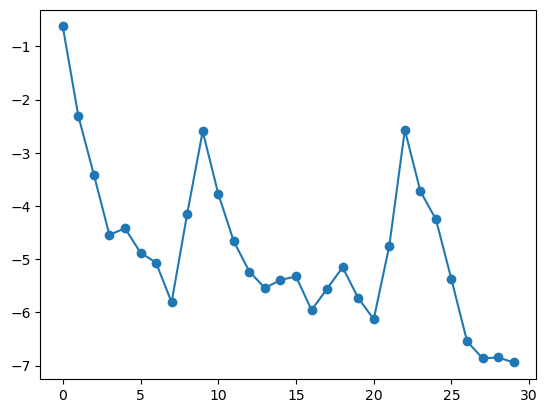

In [6]:
plt.plot(red[0, :30], '-o')
# plt.plot(eig_estimates[0, :60])